2.3: Complex Machine Learning Models and Keras Part 2

Objective: Create a Random Forest and explore the influential weather stations.

### This script contains the following:

## 1. [Import Libraries](#import_libraries)

## 2.1 [Preprocessing for Random Forest (2010 Weather Data)](#2010weather)
## 2.2 [Preprocessing for Random Forest (1990 Weather Data)](#1990weather)

## 3. [Creating Random Forests](#random)
#### 3.1 [Creating Random Forest - 2010 Weather Data](#2010random)
#### 3.2 [Creating Random Forest - 1990 Weather Data](#1990random)

## 4. [Uncovering Feature Importance](#importance)

## 5. [Modeling the 3 Most Influential Weather Stations and Uncovering their Feature Importances](#2influence)

### 5.1 [Madrid - 1990 Data](#marid1990)

#### 5.11 [Creating Random Forest for Madrid](#random_madrid)

#### 5.12 [Listing Feature Importance - Madrid](#feature_madrid)

### 5.2 [Stockholm - 1990 Data](#stockholm1990)

#### 5.21 [Creating Random Forest for Stockholm](#random_stockholm)

#### 5.22 [Listing Feature Importance - Stockholm](#feature_stockholm)

### 5.3 [Budapest - 1990 Data](#budapest1990)

#### 5.31 [Creating Random Forest for Budapest](#random_budapest)

#### 5.3.2 [Listing Feature Importance - Madrid](#feature_madrid)






## 1. Importing Libraries and Data <a id='import_libraries'></a>

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [114]:
#create a path to the folder

path = r'/content/drive/MyDrive/Careerfoundary/Machine_learning'

In [115]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [116]:
# Import cleaned weather observations data

df = pd.read_csv(os.path.join(path, '012 Data', 'Prepared_Data', 'weather_cleaned_Date.csv'), index_col = False)

In [117]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [118]:
df.shape

(22950, 137)

In [119]:
# Import predictions data

df_pleasant = pd.read_csv(os.path.join(path, '012 Data', 'Original_Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [120]:
df_pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [121]:
df_pleasant.shape

(22950, 16)

# 2.1 Preprocessing for Random Forest 1 (2010s Weather Data) <a id='2010weather'></a>

In [122]:
# Filter weather dataset to 2010s
df_2010s = df[df['DATE'].astype(str).str.startswith('201')]
df_2010s.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20                0.5                 1.2   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   
18264                0.7                8.4                     7   
18265               -1.2                0.7                     6   
18266               -3.6                3.0                     3   
18267                0.0                2.9                     8   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   
18264               0.67              1.017                       0.38   
18265               0.67              1.017                       0.29   
18266               0.67              1.017                       0.73   
18267               0.67              1.017                       0.19   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                    0.00                0.7                 5.0   
18264                    0.01                1.4                 1.6   
18265                    0.00                0.5                -1.9   
18266                    0.00                7.4                -4.1   
18267                    0.75                0.0                -3.5   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   
18264                0.1                5.8                   8   
18265               -2.6                0.2                   4   
18266               -5.9               -1.0                   8   
18267               -5.2               -2.6                   7   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
1826

In [123]:
df_2010s.shape

(3652, 137)

In [124]:
# Filter pleasant dataset to 2010s
pleasant_2010s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('201')]
pleasant_2010s.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0                      0   
18267                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   
18264                           0                           0   
18265                           0                           0   
18266                           0                           0   
18267                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0  
18264                          0  
18265                          0  
18266                          0  
18267                          0

In [125]:
# Check shape
pleasant_2010s.shape

(3652, 16)

In [126]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_2010s_2 = df_2010s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2010s_2.shape

(3652, 135)

In [127]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_2010s_2 = pleasant_2010s.drop(columns=['DATE'])

# Check shape
pleasant_2010s_2.shape

(3652, 15)

In [128]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2010s_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [129]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [130]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [131]:
# Check shape
y_1.shape

(3652,)

In [132]:
# Create X matrix
X_1 = df_2010s_2.to_numpy()

In [133]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


In [134]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [135]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(913, 135) (913,)


# 2.2 Preprocessing for Random Forest 1 (1990s Weather Data) <a id='1990weather'></a>

In [136]:
# Filter weather dataset to 1990s
df_1990s = df[df['DATE'].astype(str).str.startswith('199')]
df_1990s.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101      1                  0            0.83          1.0217   
10959  19900102      1                  2            0.84          1.0238   
10960  19900103      1                  8            0.89          1.0231   
10961  19900104      1                  2            0.77          1.0265   
10962  19900105      1                  7            0.81          1.0286   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
10958               0.86             1.0246                       0.19   
10959               0.83             1.0235                       0.18   
10960               0.88             1.0241                       0.18   
10961               0.86             1.0327                       0.39   
10962               0.62             1.0338                       1.06   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
10958                    0.00                5.3                -1.3   
10959                    0.03                0.0                -0.9   
10960                    0.11                0.0                -0.8   
10961                    0.00                0.0                -3.1   
10962                    0.00                7.7                -5.7   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
10958               -5.3                3.7                     8   
10959               -2.0               -0.2                     8   
10960               -1.4                0.0                     5   
10961               -4.5               -1.2                     6   
10962               -7.0               -1.2                     3   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
10958               0.80             1.0263                       0.18   
10959               0.87             1.0233                       0.18   
10960               0.83             1.0247                       0.32   
10961               0.73             1.0323                       0.44   
10962               0.63             1.0352                       0.47   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
10958                     0.0                0.0                 0.1   
10959                     0.0                0.0                -0.4   
10960                     0.0                0.0                -0.5   
10961                     0.0                2.8                -2.0   
10962                     0.0                3.6                -2.6   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
10958               -0.8                0.6                   8   
10959               -0.8                0.5                   7   
10960               -1.0                1.1                   8   
10961               -4.7                0.6                   7   
10962               -4.6                0.6                   8   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
1095

In [137]:
# Check shape
df_1990s.shape

(3652, 137)

In [138]:
# Filter pleasant dataset to 2010s
pleasant_1990s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('199')]
pleasant_1990s.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0                      0   
10960                          0                      0   
10961                          0                      0   
10962                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
10958                           0                           0   
10959                           0                           0   
10960                           0                           0   
10961                           0                           0   
10962                           0                           0   

       VALENTIA_pleasant_weather  
10958                          0  
10959                          0  
10960                          0  
10961                          0  
10962                          0

In [139]:
# Check shape
pleasant_1990s.shape

(3652, 16)

In [140]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_1990s_2 = df_1990s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_1990s_2.shape

(3652, 135)

In [141]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_1990s_2 = pleasant_1990s.drop(columns=['DATE'])

# Check shape
pleasant_1990s_2.shape

(3652, 15)

In [142]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = pleasant_1990s_2.max(axis=1)
print("Shape of y_2_combined:", y_1.shape)

Shape of y_2_combined: (3652,)


In [143]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [144]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [145]:
# Check shape
y_2.shape

(3652,)

In [146]:
# Create X matrix
X_2 = df_2010s_2.to_numpy()

In [147]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3652, 135)
(3652,)


In [148]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

In [149]:
# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 135) (2739,)
(913, 135) (913,)


# 3. Creating Random Forests <a id='random'></a>

# 3.1 Creating Random Forest - 2010 Weather Data <a id='2010random'></a>

In [150]:
# Creating a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth=10)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10)

In [151]:
# Perform the predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.976998904709748


In [152]:
# Check unique values in y
unique_classes = np.unique(y_1)
print(unique_classes)
print(len(unique_classes))

[0 1]
2


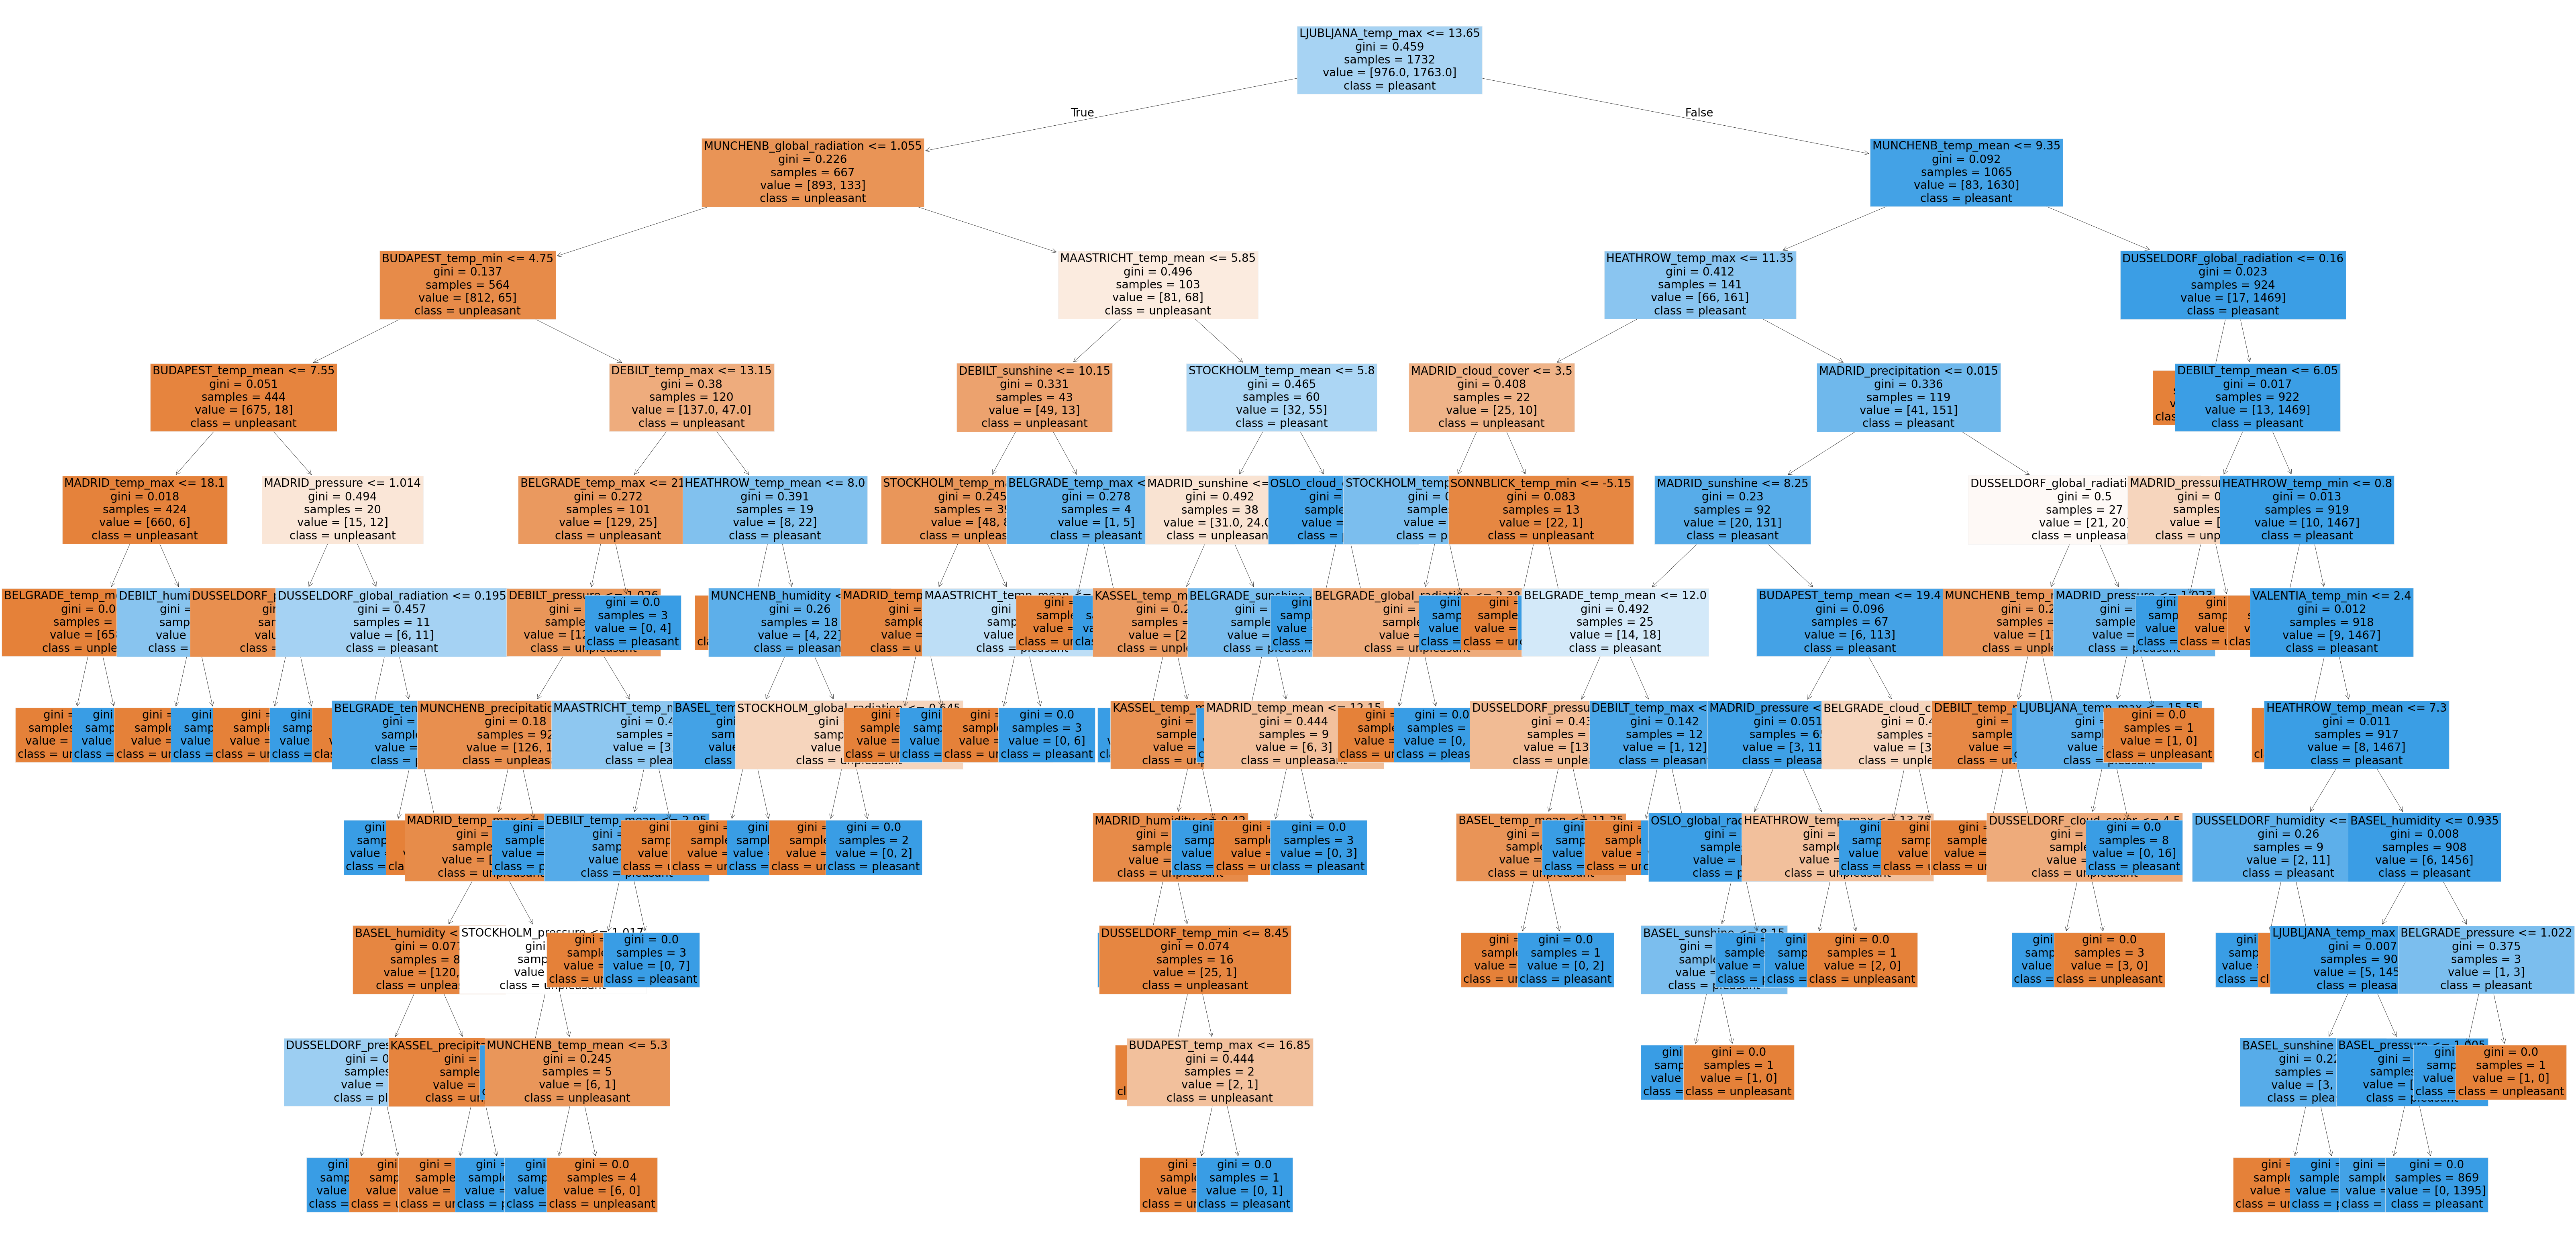

In [153]:
# Plot random forest (2010s)
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1.estimators_[5], fontsize = 20, feature_names=df_2010s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [154]:
rf_1.savefig(os.path.join(path, '014 Analysis', 'Visualizations', 'random_forest_2010s.png'),bbox_inches='tight')

# 3.2 Creating Random Forest - 1990 Weather Data <a id='1990random'></a>

In [155]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [156]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.9014238773274917


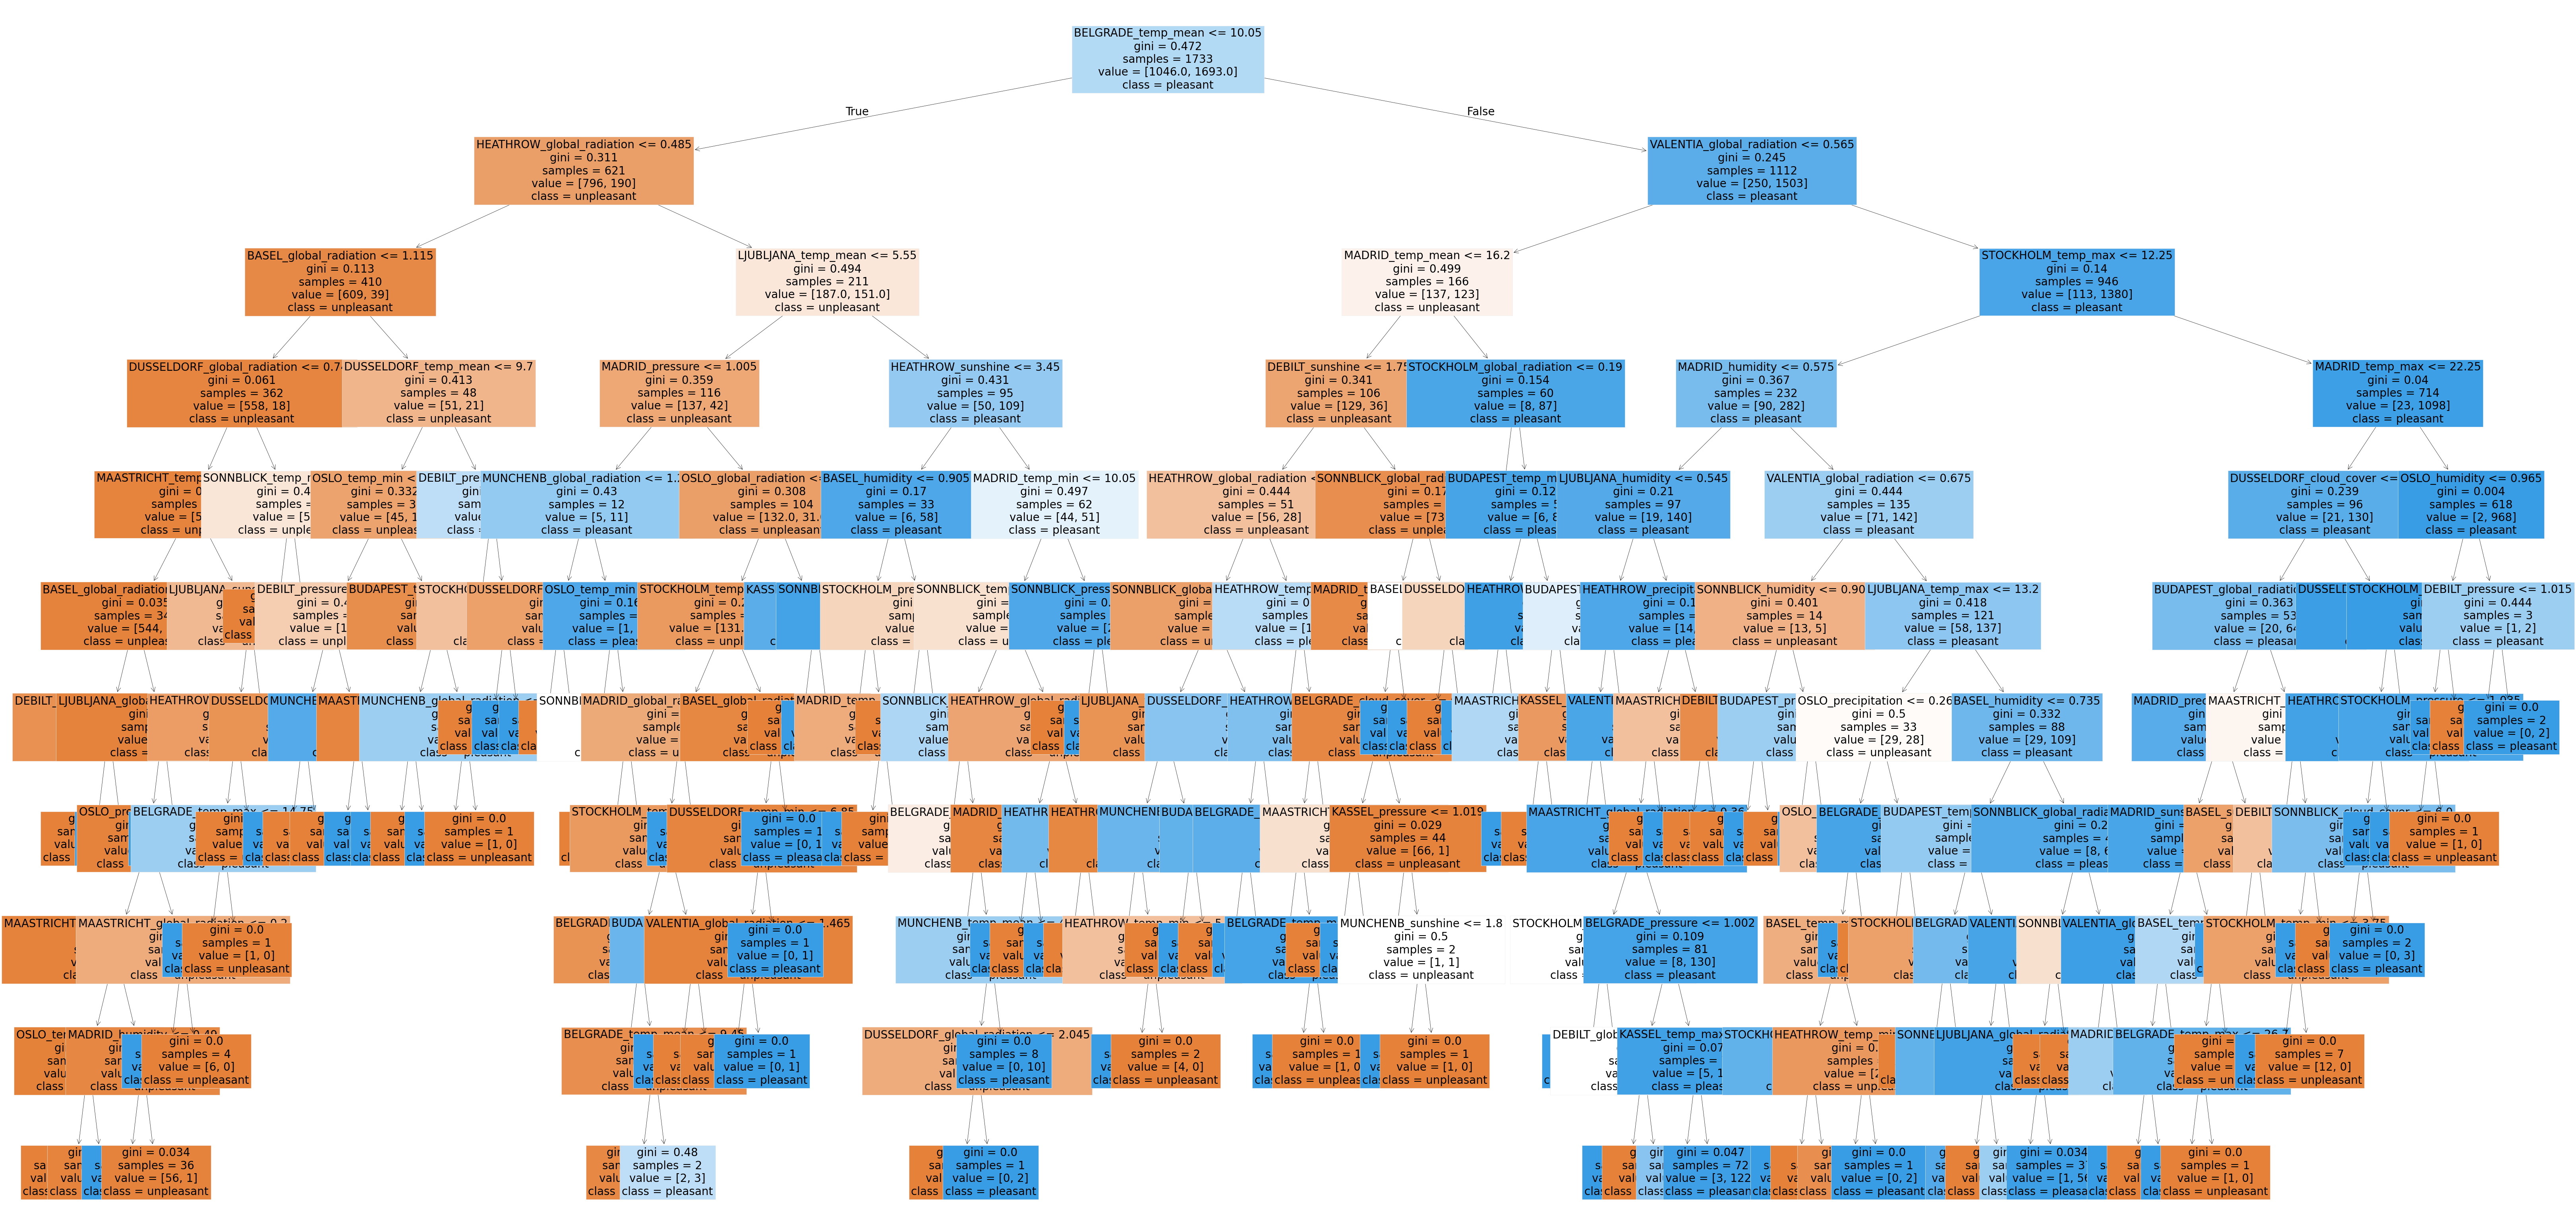

In [157]:
# Plot random forest (2010s)
rf_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=df_1990s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [158]:
rf_2.savefig(os.path.join(path, '014 Analysis', 'Visualizations', 'random_forest_1990s.png'),bbox_inches='tight')

# 4. Uncovering Feature Importances <a id='importance'></a>


**2010s Data**

In [159]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [6.12031797e-04 1.08797290e-03 1.45092932e-03 2.34060427e-03
 4.14315215e-04 1.02094238e-03 6.92636444e-02 1.42876726e-02
 4.46772085e-02 1.07754010e-03 1.90193500e-03 1.66029309e-03
 1.62106884e-03 2.70007796e-03 1.64987460e-03 1.89666409e-02
 8.35681169e-03 2.02113487e-02 3.45997695e-04 0.00000000e+00
 0.00000000e+00 6.85872206e-04 7.90907883e-04 9.58450571e-04
 5.42745213e-02 3.86101732e-03 6.56022851e-02 5.57903075e-04
 1.02748302e-03 9.57566957e-04 2.72669599e-03 8.27827828e-04
 9.39628214e-04 8.15895497e-03 1.28366628e-03 3.59318282e-02
 4.10691131e-04 8.42222950e-04 1.06011404e-03 1.68712353e-03
 5.38285659e-04 7.77110196e-04 1.52887475e-02 1.87356762e-03
 2.78492408e-02 6.77662737e-04 1.08381279e-03 1.28505673e-03
 9.11445624e-03 3.91919005e-04 1.21536430e-03 1.38156027e-02
 5.67699869e-03 1.75109663e-02 4.59024059e-04 7.68874246e-04
 7.14305133e-04 8.10943917e-04 4.32095238e-04 5.89970005e-04
 7.07799106e-04 8.06975616e-04 1.22370577e-03 5.73621325e-04
 3.

In [160]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [161]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.13515532 0.05814559 0.12651905 0.05241155 0.0503271  0.05077184
 0.00651369 0.11930988 0.06761157 0.17085647 0.05376747 0.03313021
 0.01006854 0.06210597 0.00330574]


In [162]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF',
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID',
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [163]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [164]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.170856
0            BASEL    0.135155
2         BUDAPEST    0.126519
7        LJUBLJANA    0.119310
8       MAASTRICHT    0.067612
13       STOCKHOLM    0.062106
1         BELGRADE    0.058146
10        MUNCHENB    0.053767
3           DEBILT    0.052412
5         HEATHROW    0.050772
4       DUSSELDORF    0.050327
11            OSLO    0.033130
12       SONNBLICK    0.010069
6           KASSEL    0.006514
14        VALENTIA    0.003306


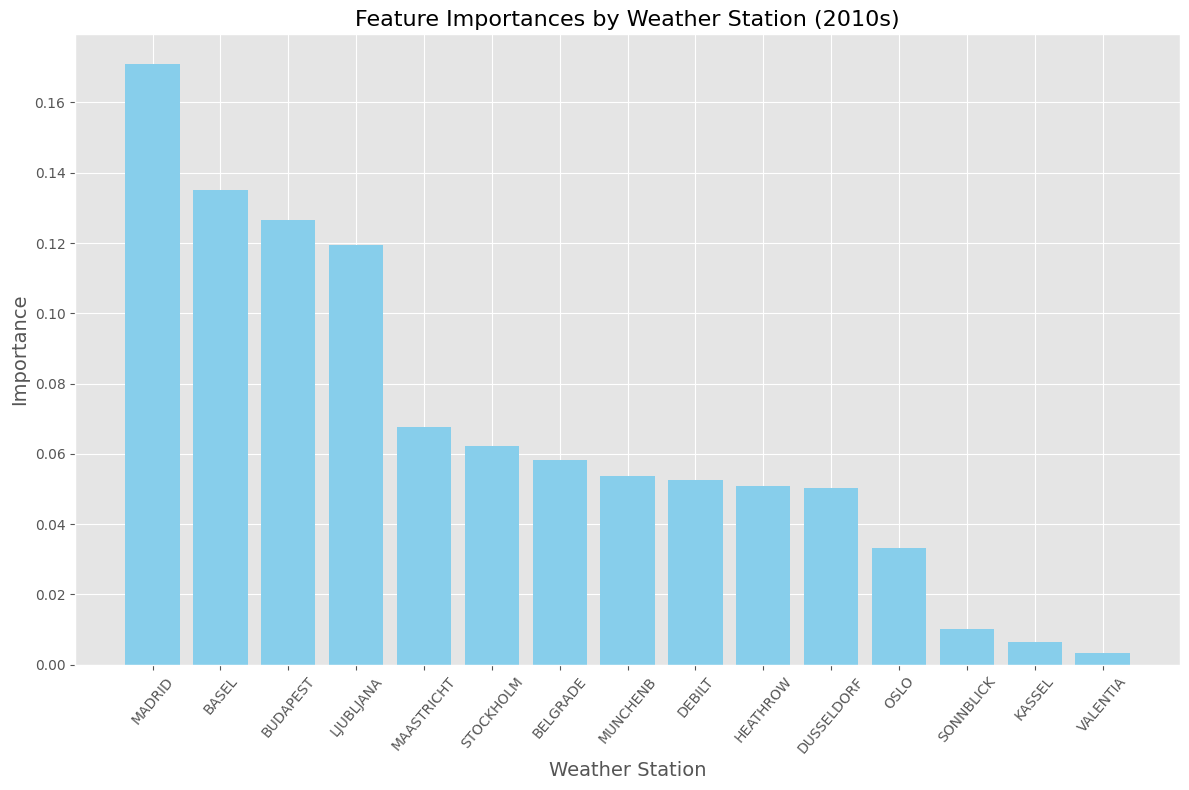

In [165]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

In [166]:
plt_1.savefig(os.path.join(path, '014 Analysis', 'Visualizations', 'feature_importances_2010s.png'),bbox_inches='tight')

**1990s Data**

In [167]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [0.00092142 0.00218348 0.00324048 0.01377553 0.00155968 0.00243737
 0.01001774 0.00300898 0.01932657 0.0012155  0.00303949 0.00343788
 0.00284026 0.00125388 0.00246895 0.0104993  0.00874437 0.00979671
 0.00057661 0.         0.         0.00118829 0.00119519 0.00142088
 0.04477633 0.02986728 0.03280602 0.00107945 0.00312404 0.00243498
 0.02091423 0.0015482  0.00263763 0.00298462 0.00279837 0.01407248
 0.00094084 0.00284787 0.00247582 0.01705579 0.00126851 0.00223387
 0.00342825 0.00237811 0.00767184 0.00138081 0.00354929 0.00261474
 0.01856012 0.00172986 0.00246993 0.00223551 0.0025902  0.02425146
 0.00080167 0.00202499 0.00172361 0.00225544 0.00082436 0.00151683
 0.00136033 0.00159816 0.00169228 0.00139065 0.00225294 0.00362942
 0.00612073 0.00206284 0.00244198 0.03055993 0.00470532 0.01525473
 0.00108942 0.0028013  0.00270204 0.00855395 0.00116397 0.00222222
 0.00358477 0.0067273  0.01840885 0.00170136 0.00344201 0.00376195
 0.01619297 0.00188608 0.0033047  0.05450

In [168]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [169]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.05647124 0.04329635 0.1118306  0.051594   0.0403009  0.05938191
 0.01379767 0.06841855 0.04725383 0.15937797 0.03813188 0.09489828
 0.0343918  0.15695381 0.02390121]


In [170]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [171]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [172]:
# Sort by importance for chart readability
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.159378
13       STOCKHOLM    0.156954
2         BUDAPEST    0.111831
11            OSLO    0.094898
7        LJUBLJANA    0.068419
5         HEATHROW    0.059382
0            BASEL    0.056471
3           DEBILT    0.051594
8       MAASTRICHT    0.047254
1         BELGRADE    0.043296
4       DUSSELDORF    0.040301
10        MUNCHENB    0.038132
12       SONNBLICK    0.034392
14        VALENTIA    0.023901
6           KASSEL    0.013798


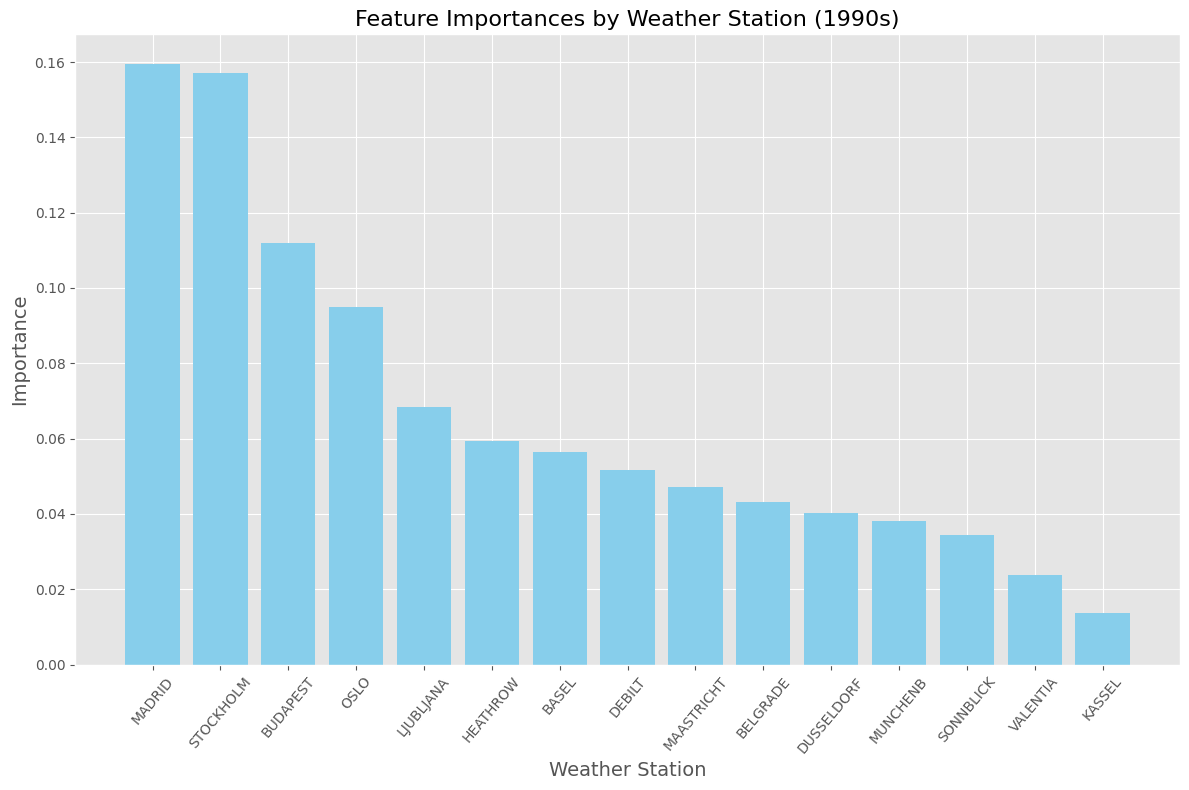

In [173]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (1990s)', fontsize=16)
plt.tight_layout()
plt.show()

In [174]:
plt_2.savefig(os.path.join(path, '014 Analysis', 'Visualizations', 'feature_importances_1990s.png'),bbox_inches='tight')

# 5. Modeling the 3 Most Influential Weather Stations and Uncovering their Feature Importances <a id='2influence'></a>

# 5.1 Madrid - 1990 Data <a id='marid1990'></a>

**Preprocessing the Data for Madrid**

In [175]:
# Filter weather dataset to only include Madrid
df_mad = df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_mad.head()

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92           1.0260   
1                   7             0.86           1.0254   
2                   5             0.90           1.0287   
3                   0             0.75           1.0281   
4                   2             0.64           1.0269   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   
1                     0.46                   0.0              0.9   
2                     0.63                   0.0              2.3   
3                     1.16                   0.0              8.7   
4                     1.10                   0.0              7.8   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8  
1               9.8              7.4             12.2  
2               8.6              6.4             10.8  
3              10.3              4.5             16.1  
4              12.1              8.2             16.0

In [176]:
# Filter pleasant dataset to only include Madrid
mad_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head()

MADRID_pleasant_weather
0                        0
1                        0
2                        0
3                        0
4                        0

In [177]:
# Check shape
print(df_mad.shape)
print(mad_pleasant.shape)

(22950, 9)
(22950, 1)


In [178]:
# Create matrices
y_3 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [179]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [180]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [181]:
# Create X matrix
X_3 = df_mad.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [182]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# 5.11 Creating Random Forest for Madrid <a id='random_madrid'></a>

In [183]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [184]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.99355176019519


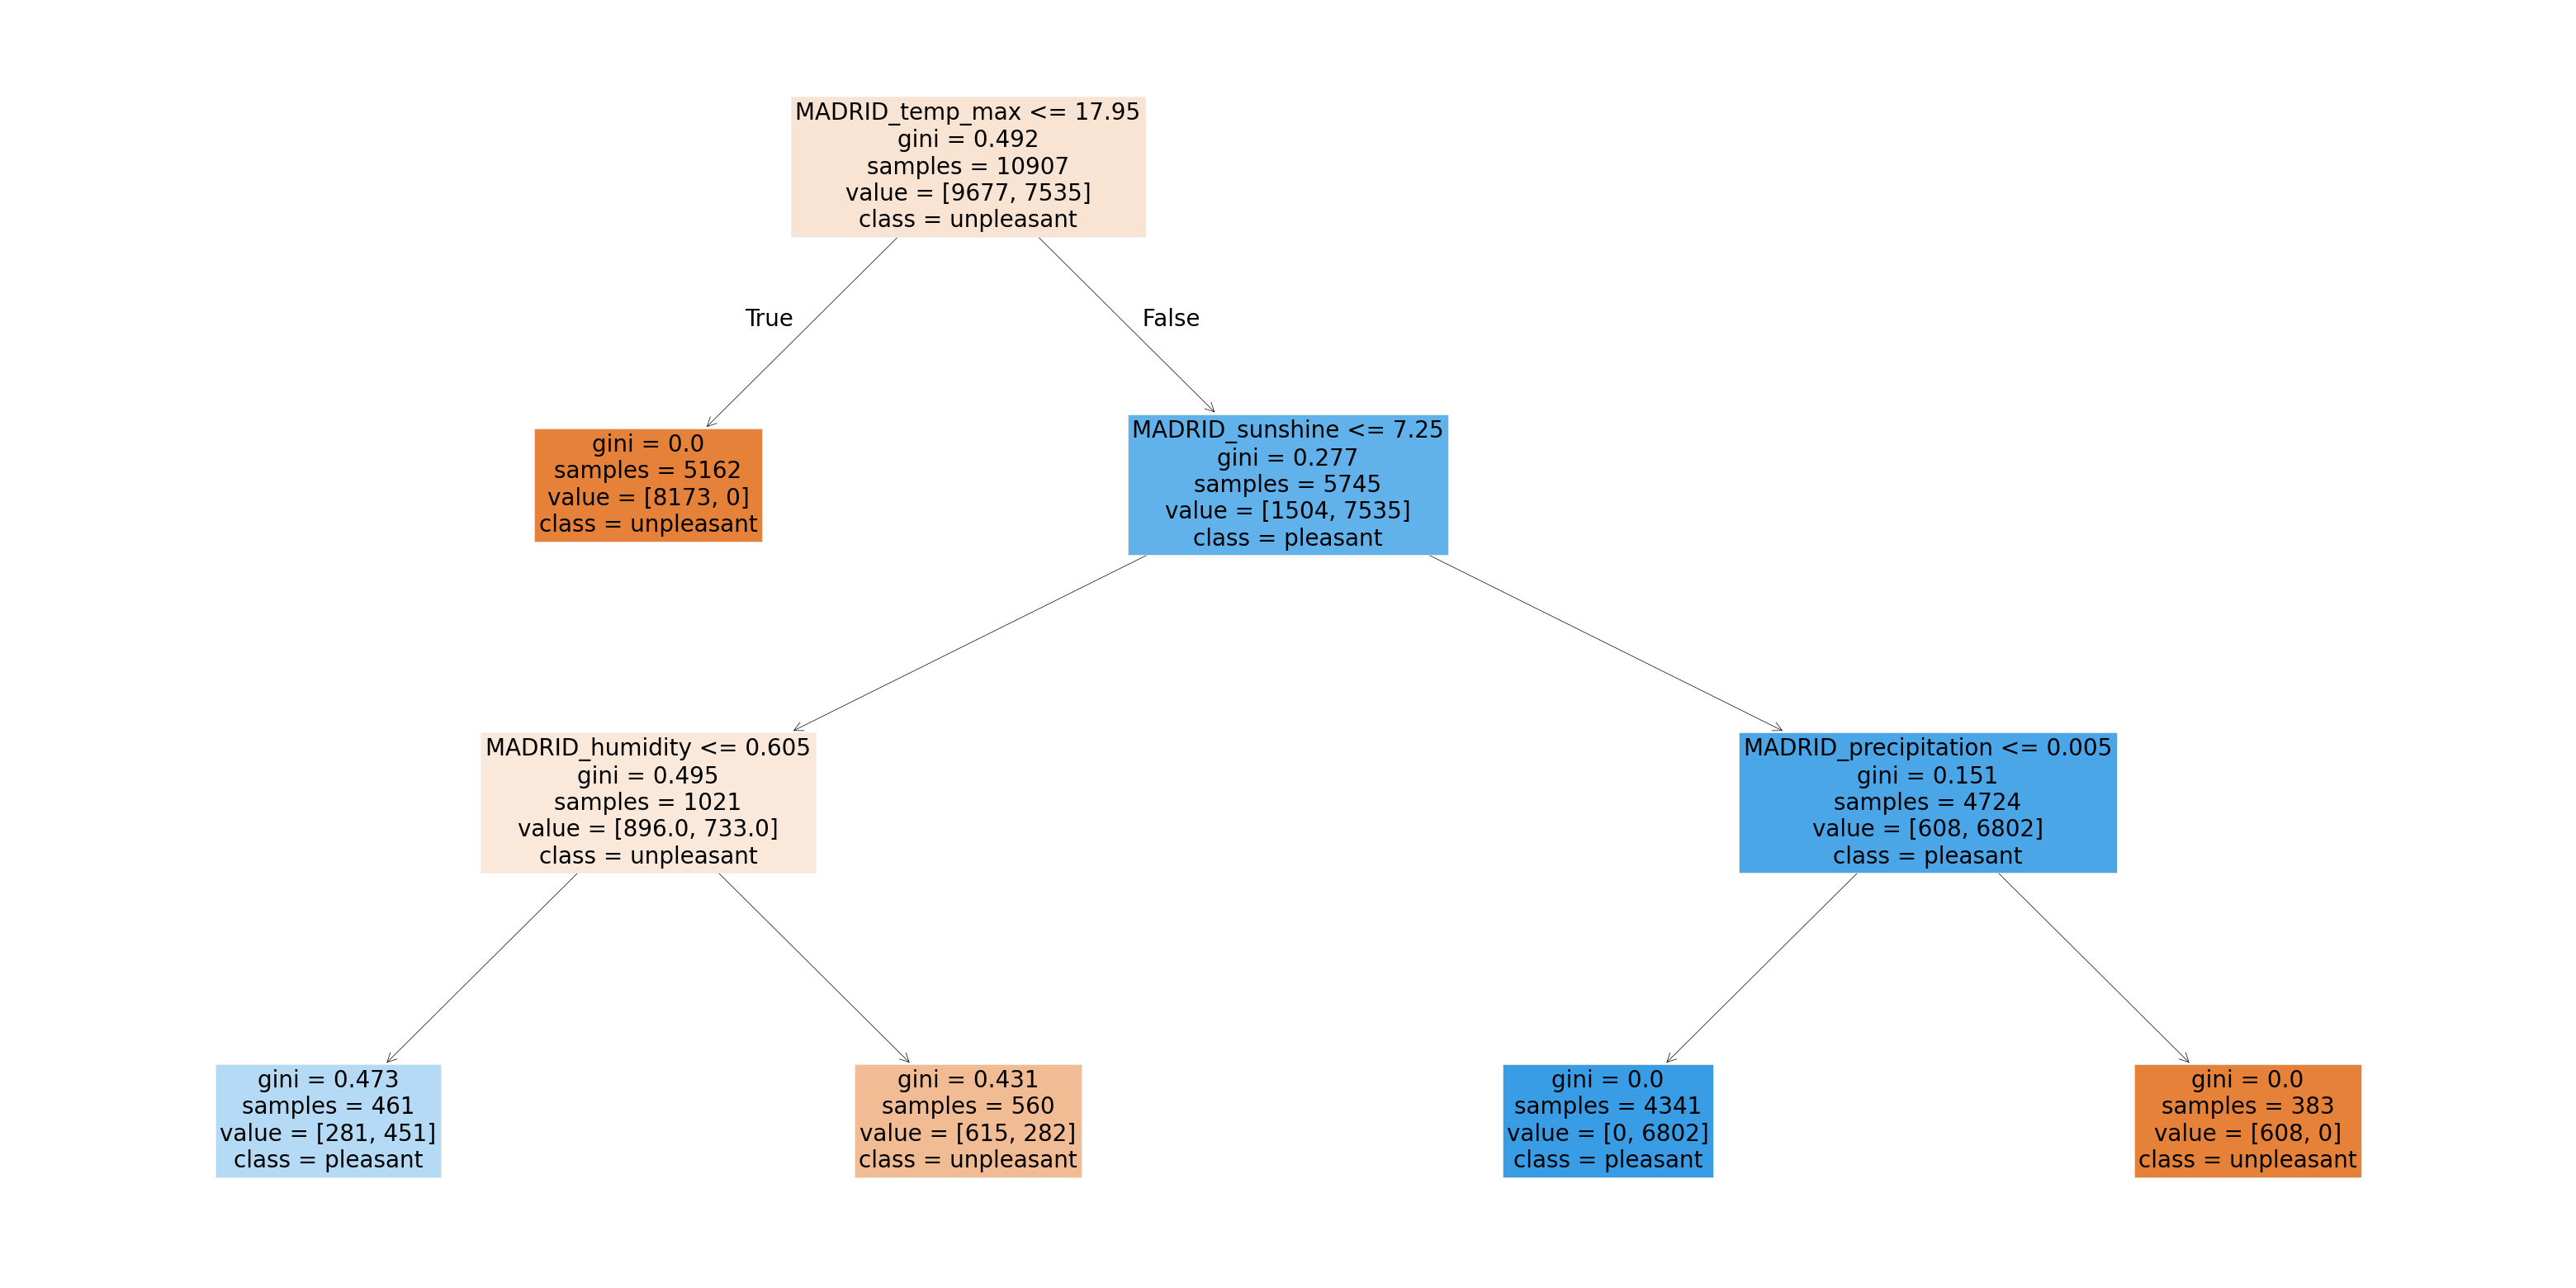

In [185]:
# Plot random forest (Madrid)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [186]:
# Export the plot
rf_3.savefig(os.path.join(path, '014 Analysis', 'Visualizations', 'random_forest_madrid.png'),bbox_inches='tight')

# 5.12 Listing Feature Importances - Madrid <a id='feature_madrid'></a>


In [187]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.01652026 0.0206511  0.00052151 0.06743356 0.11928432 0.11430525
 0.22706665 0.07500834 0.35920902]
(9,)


In [188]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation',
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [189]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [190]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.359209
6         temp_mean    0.227067
4     precipitation    0.119284
5          sunshine    0.114305
7          temp_min    0.075008
3  global_radiation    0.067434
1          humidity    0.020651
0       cloud_cover    0.016520
2          pressure    0.000522


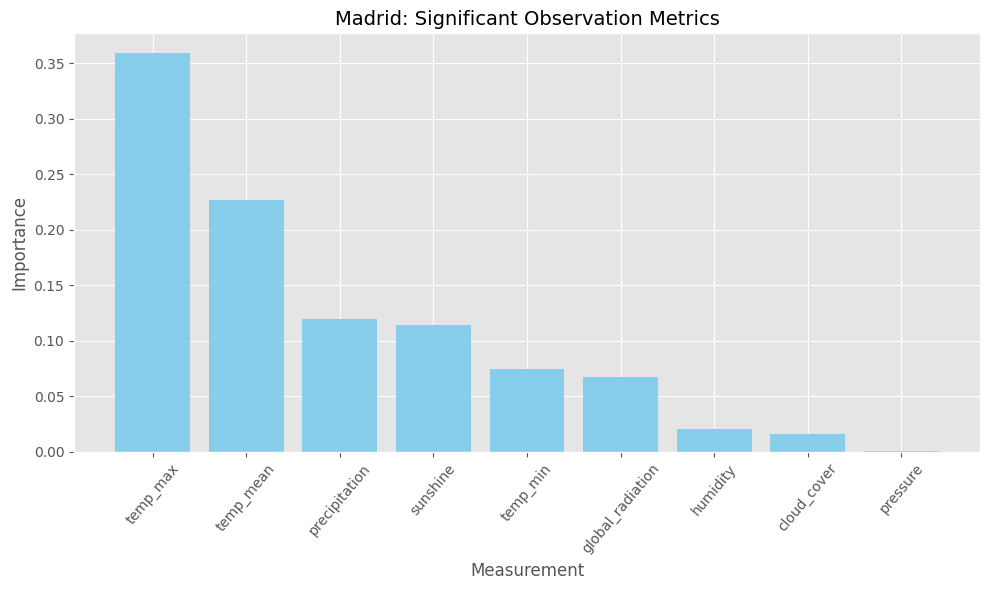

In [191]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

# 5.2 Stockholm - 1990 Data <a id='stockholm1990'></a>

**Preprocessing the Data for Stokholm**

In [192]:
# Filter weather dataset to only include Budapest
df_sto = df[df.columns[df.columns.astype(str).str.startswith('STOCKHOLM')]]

# Check output
df_sto.head()

STOCKHOLM_cloud_cover  STOCKHOLM_humidity  STOCKHOLM_pressure  \
0                      5                0.98              1.0114   
1                      5                0.62              1.0114   
2                      5                0.69              1.0114   
3                      5                0.98              1.0114   
4                      5                0.96              1.0114   

   STOCKHOLM_global_radiation  STOCKHOLM_precipitation  STOCKHOLM_sunshine  \
0                        0.05                     0.32                 0.0   
1                        0.05                     0.06                 0.0   
2                        0.05                     0.02                 0.0   
3                        0.05                     0.00                 0.0   
4                        0.05                     1.32                 0.0   

   STOCKHOLM_temp_mean  STOCKHOLM_temp_min  STOCKHOLM_temp_max  
0                  4.2                 2.2                 4.9  
1                  4.0                 3.0                 5.0  
2                  2.4                 1.3                 4.1  
3                  1.2                 0.4                 2.3  
4                  3.3                 0.8                 4.3

In [193]:
# Filter pleasant dataset to only include Budapest
sto_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('STOCKHOLM')]]

# Check output
sto_pleasant.head()

STOCKHOLM_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0

In [194]:
# Check shape
print(df_sto.shape)
print(sto_pleasant.shape)

(22950, 9)
(22950, 1)


In [195]:
# Create matrices
y_4 = sto_pleasant.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [196]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [197]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(22950,)


In [198]:
# Create X matrix
X_4 = df_sto.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [199]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# 5.21 Creating a Random Forest for Stockholm <a id='random_madrid'></a>


In [200]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [201]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9982572324851865


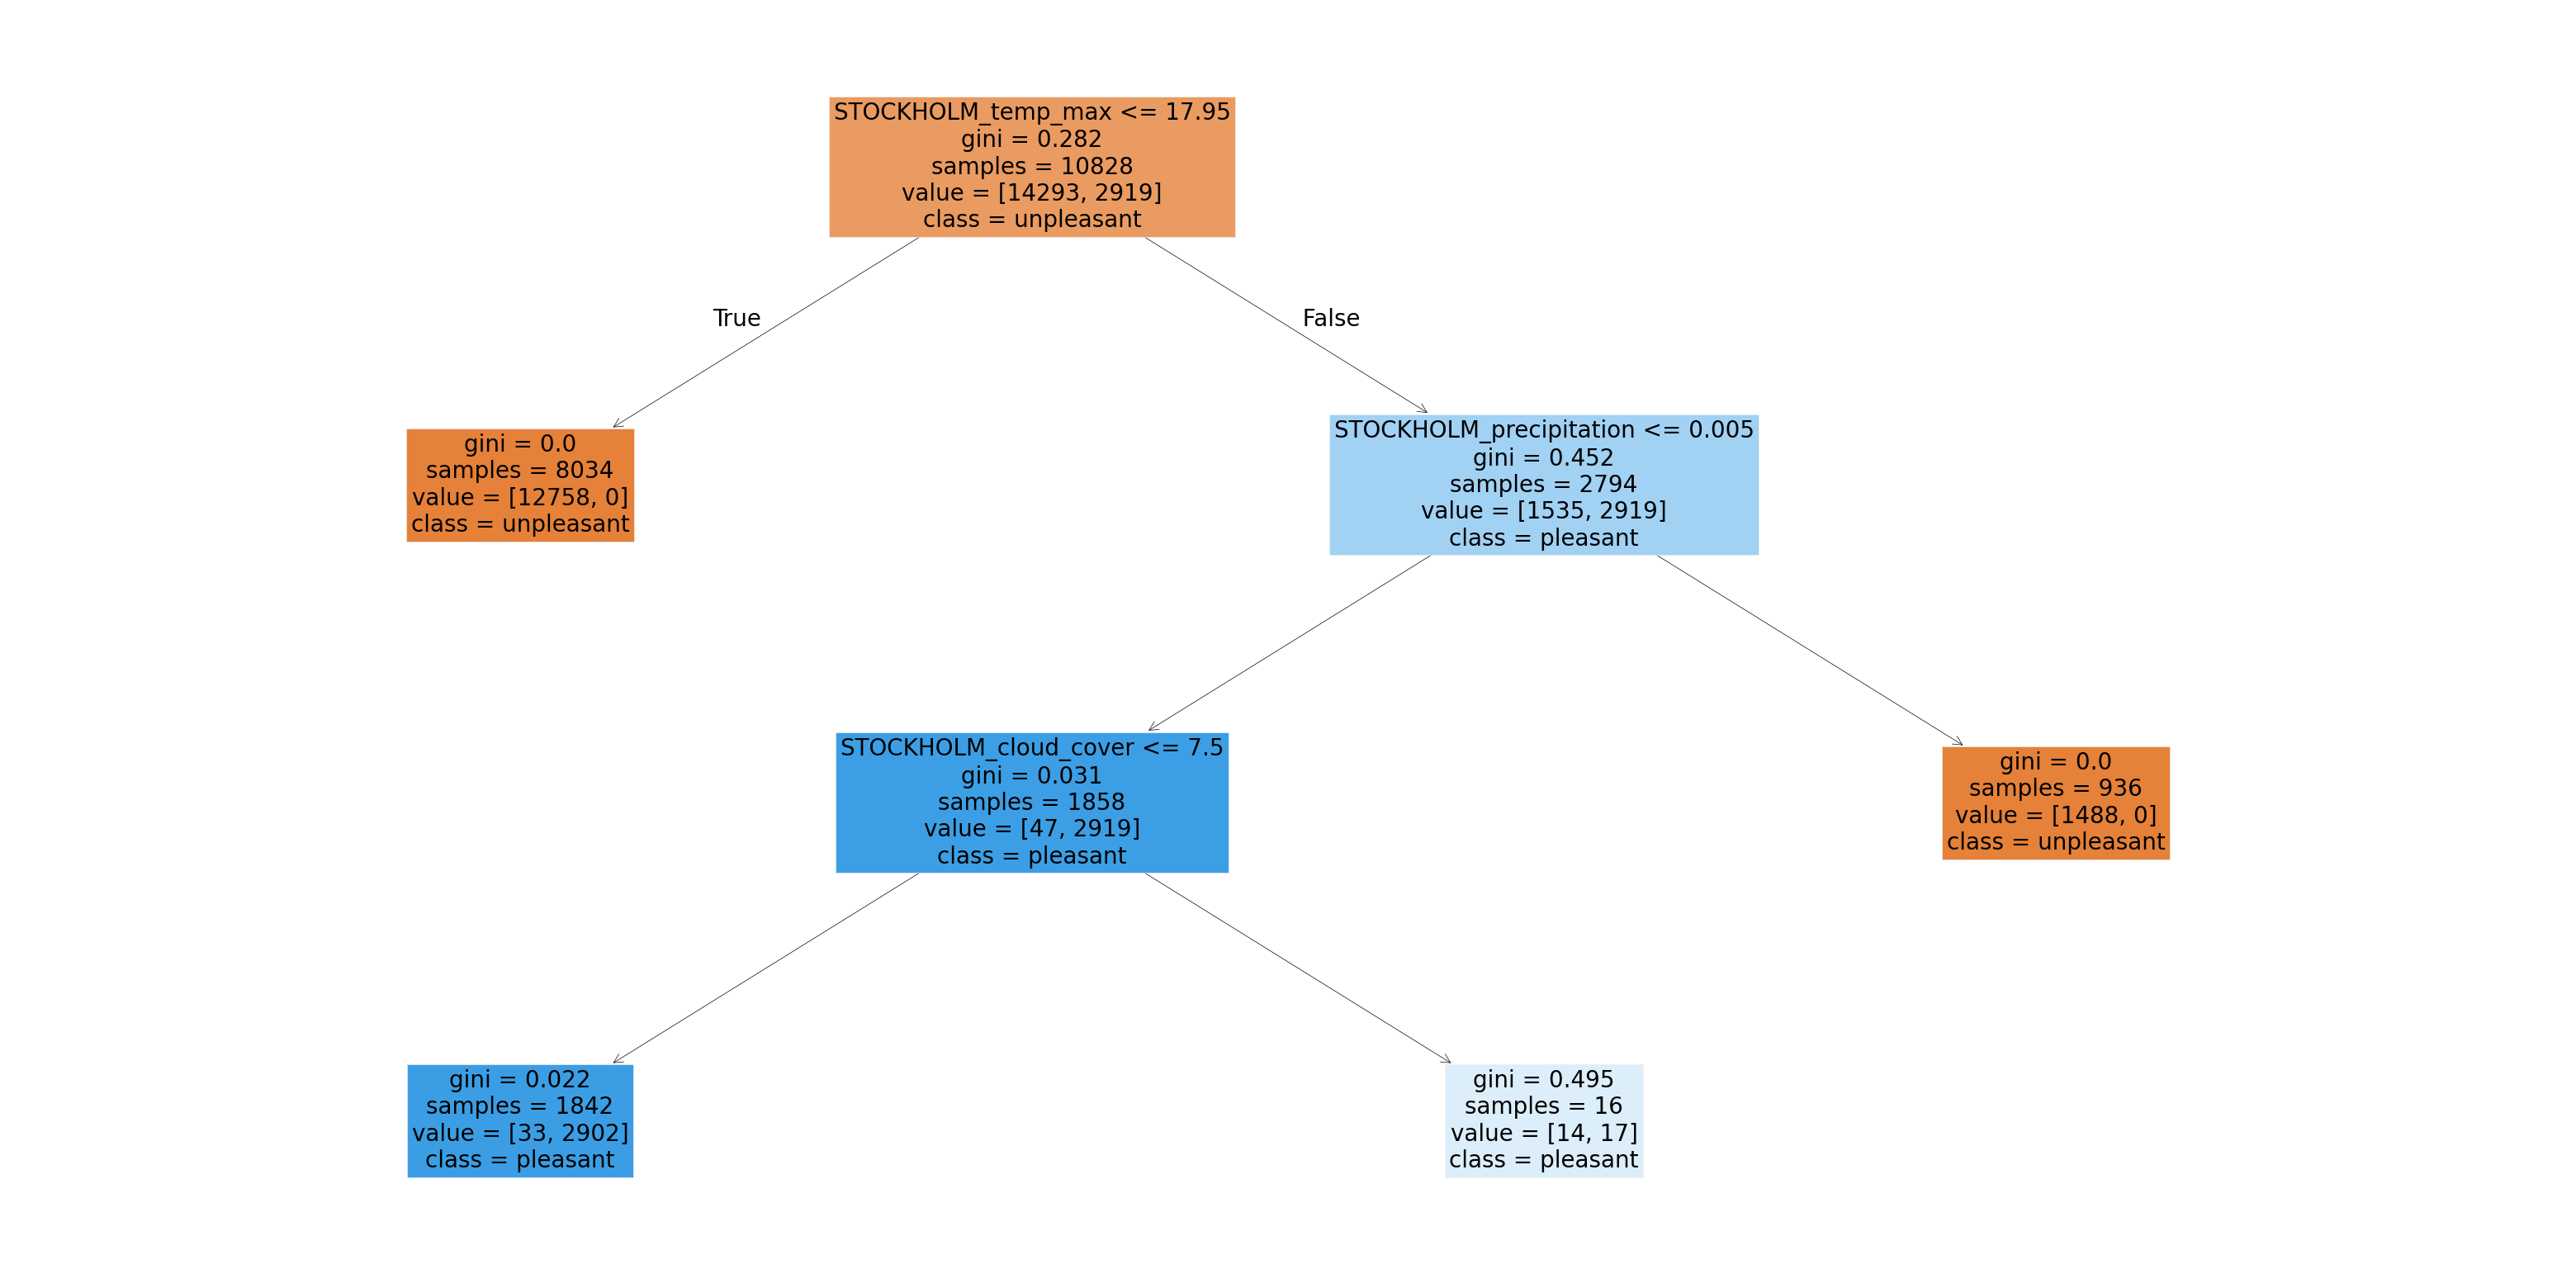

In [202]:
# Plot random forest (Stockholm)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_sto.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [203]:
rf_4.savefig(os.path.join(path, '014 Analysis', 'Visualizations', 'random_forest_stockholm.png'),bbox_inches='tight')

# 5.22 Listing Feature Importance - Stockholm <a id='feature_stockholm'></a>

In [204]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.01010661 0.0004781  0.01480768 0.12158789 0.16822053 0.08754623
 0.21541208 0.09484722 0.28699366]
(9,)


In [205]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [206]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
8          temp_max    0.286994
6         temp_mean    0.215412
4     precipitation    0.168221
3  global_radiation    0.121588
7          temp_min    0.094847
5          sunshine    0.087546
2          pressure    0.014808
0       cloud_cover    0.010107
1          humidity    0.000478


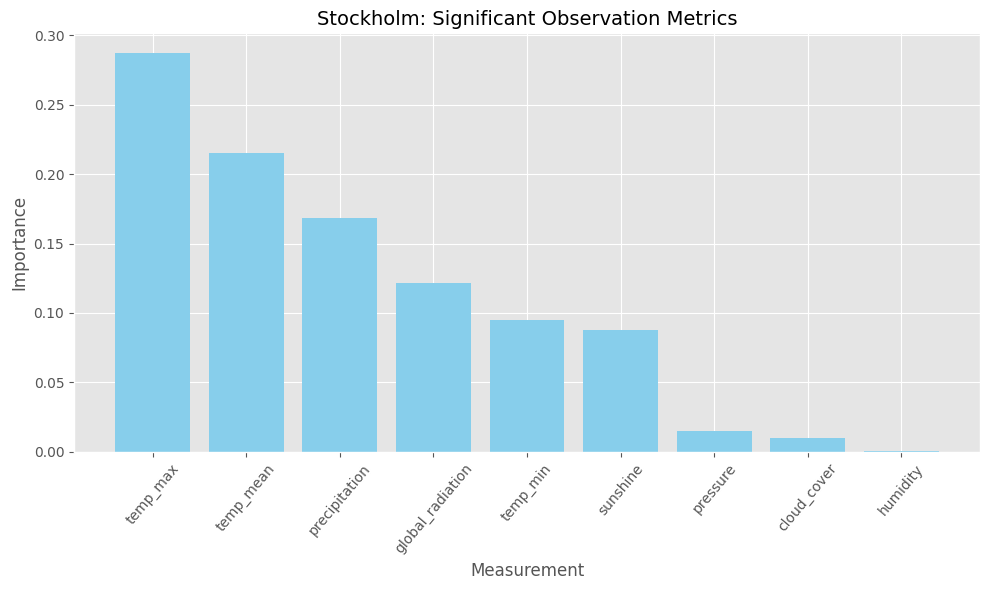

In [207]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Stockholm: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

# 5.3 Budapest Data - 1990 Data <a id='budapest1990'></a>

**Processing the data for Budapest**

In [208]:
# Filter weather dataset to only include Budapest
df_bud = df[df.columns[df.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_bud.head()

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1  
1                 2.3                1.4                3.1  
2                 2.7                1.7                5.3  
3                 2.0                0.4                4.4  
4                 2.5                1.1                5.3

In [209]:
# Filter pleasant dataset to only include Budapest
bud_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
bud_pleasant.head()

BUDAPEST_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [210]:
# Check shape
print(df_bud.shape)
print(bud_pleasant.shape)

(22950, 9)
(22950, 1)


In [211]:
# Create matrices
y_5 = bud_pleasant.max(axis=1)

# Check shape
print("Shape of y_5_combined:", y_5.shape)

Shape of y_5_combined: (22950,)


In [212]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_5_combined:", y_5.unique())

Unique values in y_5_combined: [0 1]


In [213]:
# Ensure y has the correct shape
y_5 = y_5.to_numpy().reshape(-1)

# Check shape
print(y_5.shape)

(22950,)


In [214]:
# Create X matrix
X_5 = df_bud.to_numpy()

# Check shapes of the matrices
print(X_5.shape)
print(y_5.shape)

(22950, 9)
(22950,)


In [215]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=127)

# Check shapes
print(X_train_5.shape, y_train_5.shape)
print(X_test_5.shape, y_test_5.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# 5.31 Creating a Random Forest for Budapest <a id='random_budapest'></a>

In [216]:
# Creating a Random Forest classifier
clf_5 = RandomForestClassifier(n_estimators = 100, max_depth=3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_5.fit(X_train_5, y_train_5)

RandomForestClassifier(max_depth=3)

In [217]:
# Perform the predictions on the test dataset
y_pred_5 = clf_5.predict(X_test_5)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_5, y_pred_5))

Model Accuracy:  0.9980829557337051


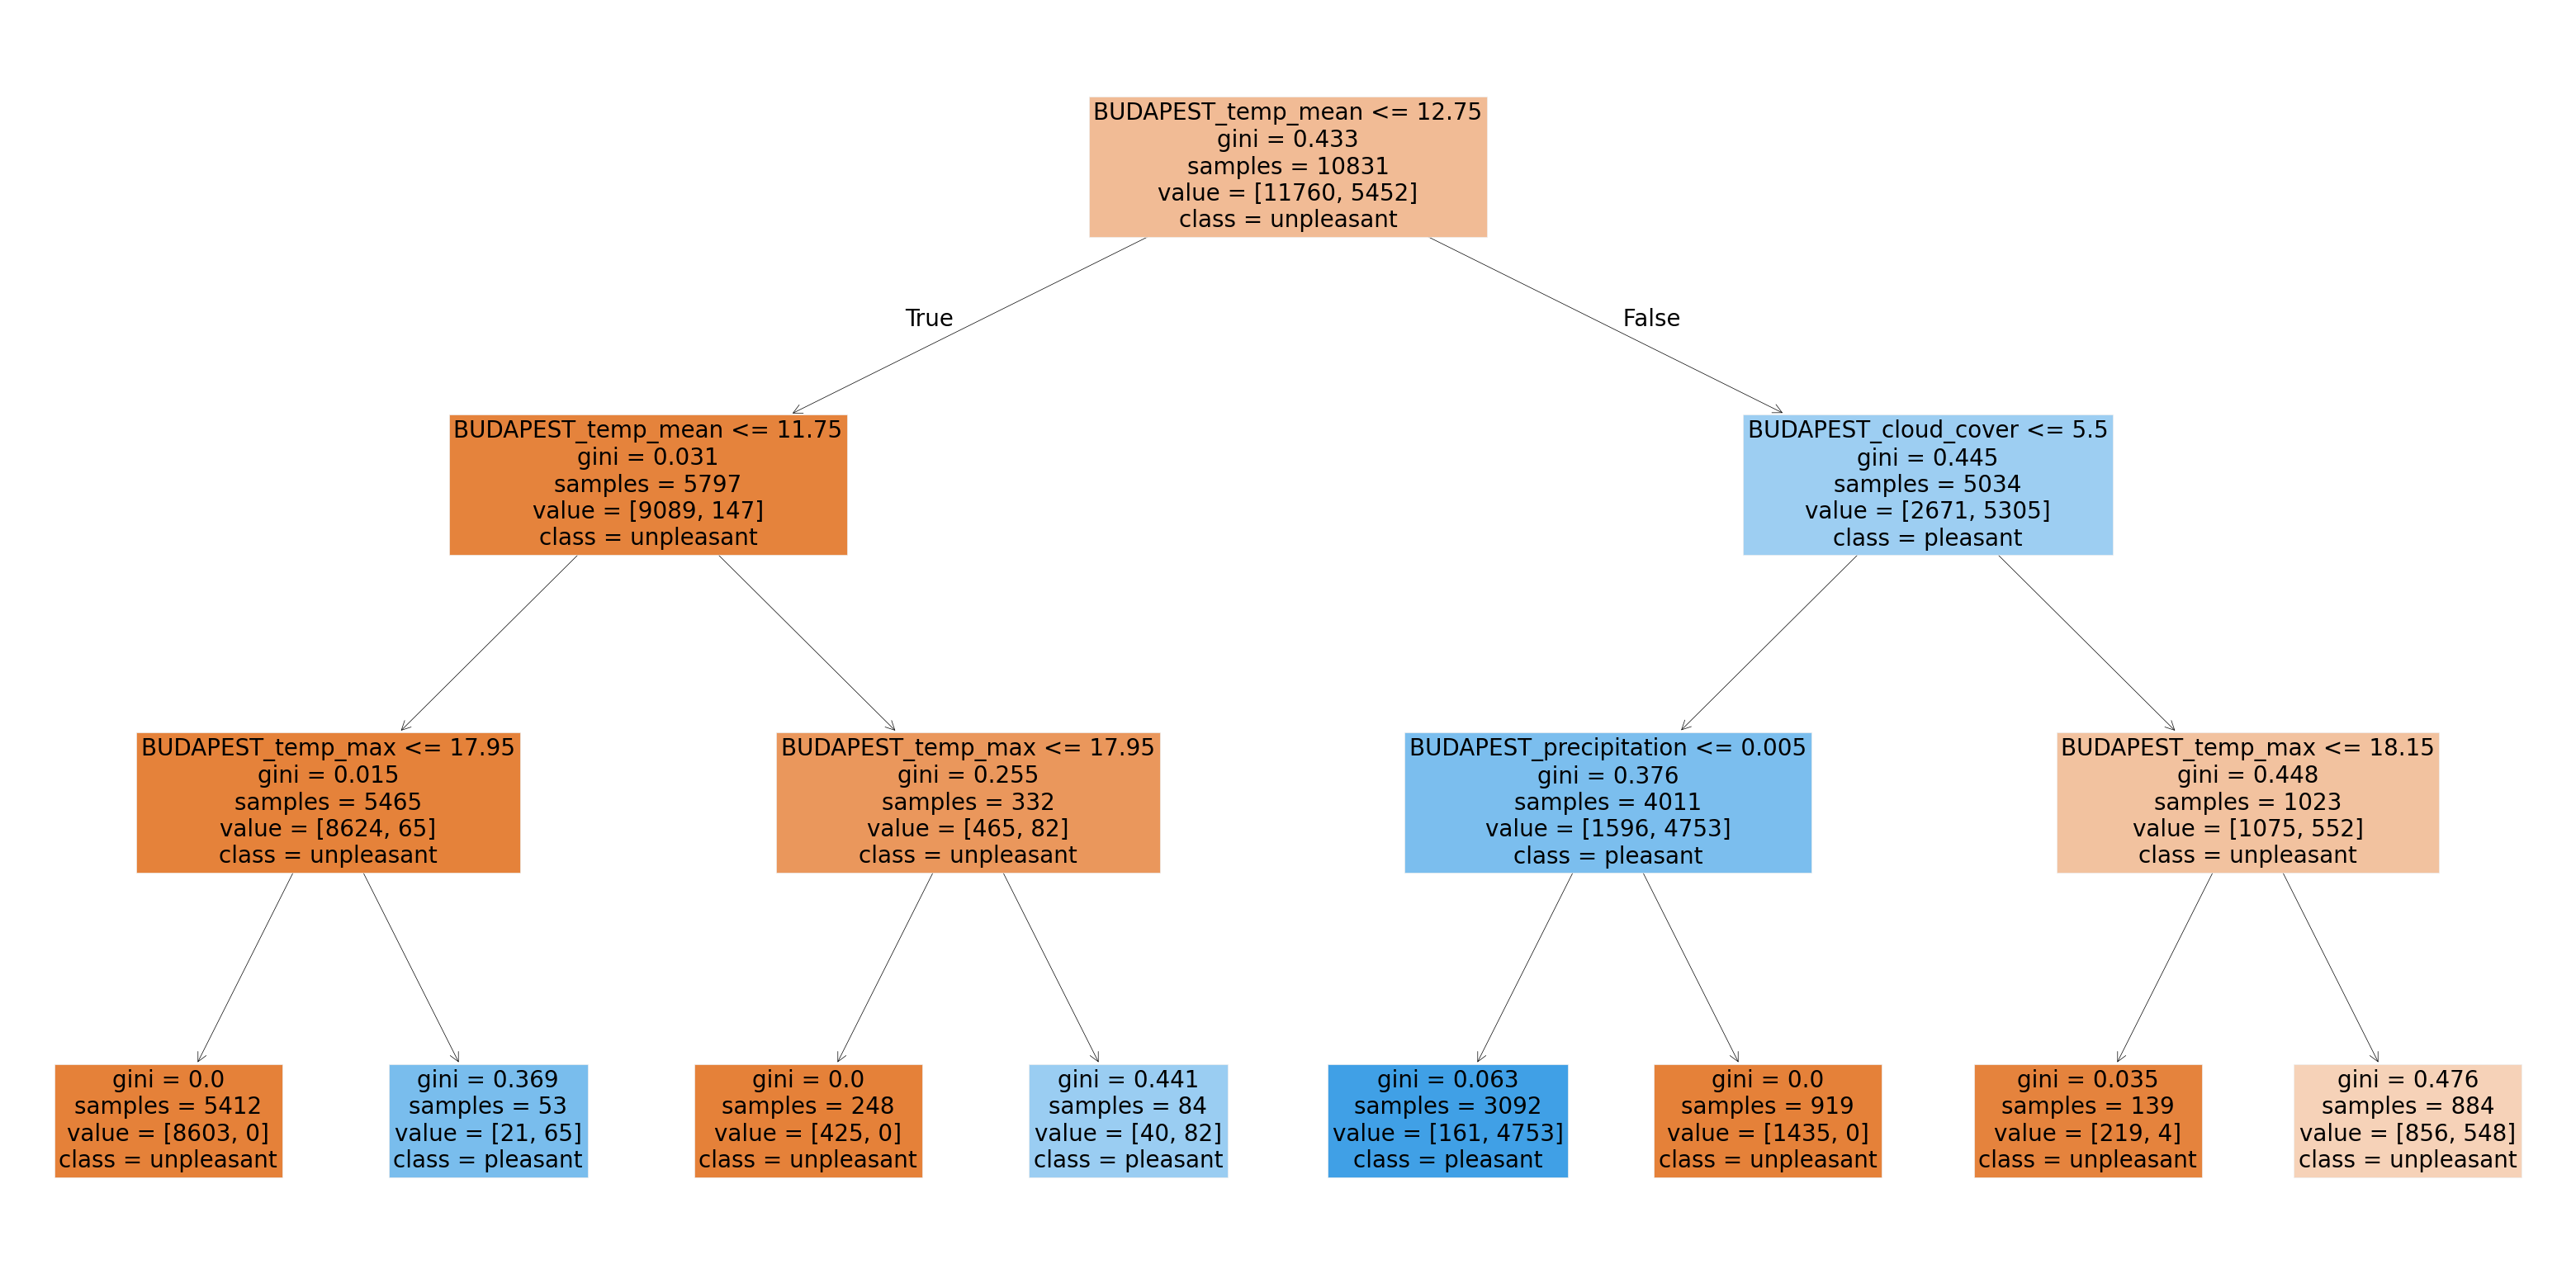

In [218]:
# Plot random forest (Ljubljana)
rf_5 = plt.figure(figsize=(40,20))
plot_tree(clf_5.estimators_[5], fontsize = 20, feature_names=df_bud.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [219]:
# Export plot
rf_5.savefig(os.path.join(path, '014 Analysis', 'Visualizations', 'random_forest_budapest.png'),bbox_inches='tight')

# 5.32 Listing Feature Importances - Budapest <a id='feature_madrid'></a>

In [220]:
# Retrieve feature importances from the trained model
feature_importances_5 = clf_5.feature_importances_
print("Feature Importances:", feature_importances_5)
print(feature_importances_5.shape)

Feature Importances: [0.01743342 0.00625773 0.00167628 0.05459531 0.21626913 0.05954665
 0.17729482 0.11562525 0.35130141]
(9,)


In [221]:
# Create a dataframe to associate observation measurements with their importances
importances_df_5 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_5
})

In [222]:
# Sort by importance for chart readability
importances_df_5= importances_df_5.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_5)

Feature Importance:
        Measurement  Importance
8          temp_max    0.351301
4     precipitation    0.216269
6         temp_mean    0.177295
7          temp_min    0.115625
5          sunshine    0.059547
3  global_radiation    0.054595
0       cloud_cover    0.017433
1          humidity    0.006258
2          pressure    0.001676


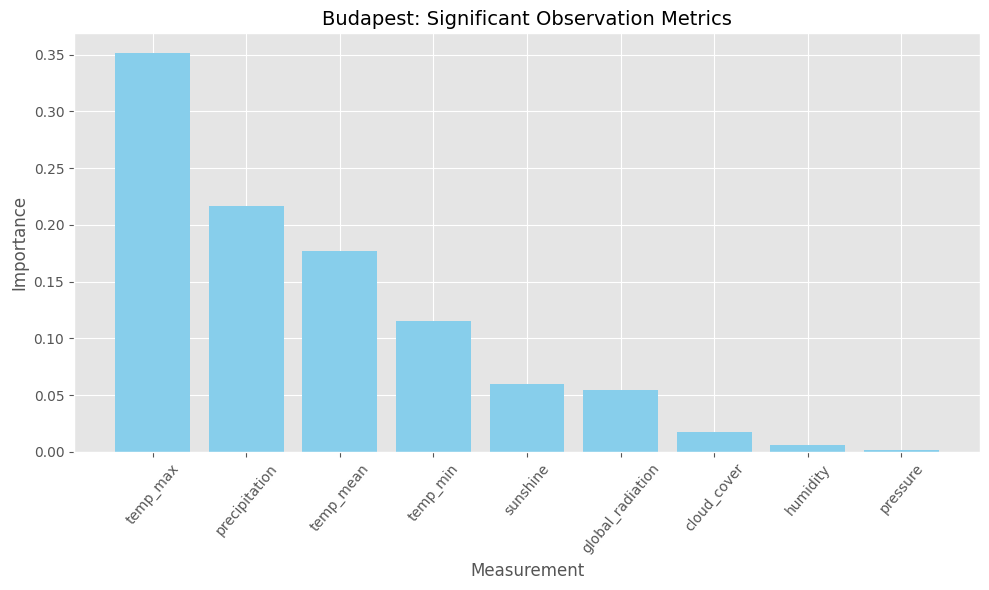

In [223]:
# Plot the importances

plt.style.use('ggplot')
plt_5 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_5['Measurement'], importances_df_5['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()